In [1]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import os
import datetime
print('Last run:', datetime.datetime.now().strftime('%Y-%m-%d'))

Last run: 2023-12-31


# 1. Filter SNPs by MAF and GWAS p value

(array([  1.,   1.,   1.,   3.,   8.,   6.,  14.,  36.,  46.,  52.,  73.,
         82., 109., 144., 161., 149., 148., 118., 118.,  97.,  74.,  67.,
         27.,  32.,  15.,  13.,   4.,   2.,   4.,   1.]),
 array([-3.52839296, -3.30079803, -3.0732031 , -2.84560816, -2.61801323,
        -2.3904183 , -2.16282337, -1.93522843, -1.7076335 , -1.48003857,
        -1.25244364, -1.02484871, -0.79725377, -0.56965884, -0.34206391,
        -0.11446898,  0.11312596,  0.34072089,  0.56831582,  0.79591075,
         1.02350569,  1.25110062,  1.47869555,  1.70629048,  1.93388542,
         2.16148035,  2.38907528,  2.61667021,  2.84426515,  3.07186008,
         3.29945501]),
 <BarContainer object of 30 artists>)

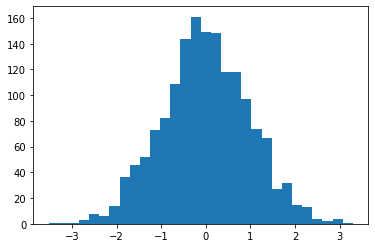

In [43]:
# Troubleshoot
# Check lipid species: CE-24:4-
# fastGWA did not complete due to error: fastGWA-REML can't converge
df_lip_pheno = pd.read_csv('/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/supporting_files/GWAS_files/lipid_species/CE-24:4-.pheno',
                           sep=' ', header=None)
# Compare to old residuals
fig, ax = plt.subplots()
ax.hist(df_lip_pheno[2], bins=30)

## 1.1 Lipid class

In [8]:
# Create commands to subset GWAS result, filter by gwas pval with and without given MAF
# Below code is based on pre-filterd GWAS files at pval of 1e-3. Change gwas_result_dir if needed
def create_commands_to_subset_GWAS_result(lipid_type, pval_threshold, maf_threshold, suffix):
    '''
    :param lipid_type: class or species
    :param pval_threshold: p value threshold
    :param maf_threshold: MAF threshold
    :param suffix: suffix of GWAS result file. For fastGWA the result files ends with .fastGWA
    :return: Save commands into file using given p value threshold, with or without MAF threshold
    '''
    print(f'Lipid_type:{lipid_type}; pval threshold: {pval_threshold}; MAF threshold: {maf_threshold}')
    gwas_result_dir = f'/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/fastGWA/lipid_{lipid_type}_filter_by_pval_1e-03'
    output_no_maf = f'/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/fastGWA/lipid_{lipid_type}_filter_by_pval_{pval_threshold}'
    output_with_maf = f'/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/fastGWA/lipid_{lipid_type}_filter_by_pval_{pval_threshold}_MAF_{maf_threshold}'
    script_dir = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/code'

    cmd_fn_no_maf = f'run_filter_gwas_snps_lipid_{lipid_type}_cmds.pval_{pval_threshold}.txt'
    cmd_fn_with_maf = f'run_filter_gwas_snps_lipid_{lipid_type}_cmds.pval_{pval_threshold}.maf_{maf_threshold}.txt'

    fh_no_maf = open(cmd_fn_no_maf, 'w')
    fh_with_maf = open(cmd_fn_with_maf, 'w')
    for fn in os.listdir(gwas_result_dir):
        if fn.endswith(suffix) and fn!='all_SNPs.pval_0.001.txt': # Ignore mreged SNP if redo the subsetting
            cmd_no_maf = f'python {script_dir}/GWAS_03_filter_gwas_snps.py --input {gwas_result_dir}/{fn} --output_dir {output_no_maf} --pval {pval_threshold}'
            cmd_with_maf = f'python {script_dir}/GWAS_03_filter_gwas_snps.py --input {gwas_result_dir}/{fn} --output_dir {output_with_maf} --pval {pval_threshold} --maf {maf_threshold}'

            fh_no_maf.write(cmd_no_maf+'\n')
            fh_with_maf.write(cmd_with_maf+'\n')
    fh_no_maf.close()
    fh_with_maf.close()
    print('DONE\n')

In [9]:
# Test p value of 1e-3 to 5e-8.
# According to literature, genome-wide pval<5e-8 is better with less overfitting
create_commands_to_subset_GWAS_result(lipid_type = 'class', pval_threshold = 1e-4, maf_threshold = 1e-2, suffix='txt')
create_commands_to_subset_GWAS_result(lipid_type = 'class', pval_threshold = 1e-5, maf_threshold = 1e-2, suffix='txt')
create_commands_to_subset_GWAS_result(lipid_type = 'class', pval_threshold = 1e-6, maf_threshold = 1e-2, suffix='txt')
create_commands_to_subset_GWAS_result(lipid_type = 'class', pval_threshold = 1e-7, maf_threshold = 1e-2, suffix='txt')
create_commands_to_subset_GWAS_result(lipid_type = 'class', pval_threshold = 5e-8, maf_threshold = 1e-2, suffix='txt')


Lipid_type:class; pval threshold: 0.0001; MAF threshold: 0.01
DONE



## 1.2 Lipid species

In [27]:
# Create commands to subset GWAS result
gwas_result_dir = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/fastGWA/lipid_species'
input_dir = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/fastGWA/lipid_species'
output_no_maf = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/fastGWA/lipid_species_filter_by_pval_1e-3'
output_with_maf = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/fastGWA/lipid_species_filter_by_pval_1e-3_MAF_5e-2'
script_dir = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/code'

cmd_fn_no_maf = 'filter_gwas_snps_lipid_species_cmds_no_maf.txt'
cmd_fn_with_maf = 'filter_gwas_snps_lipid_species_cmds.txt'

fh_no_maf = open(cmd_fn_no_maf, 'w')
fh_with_maf = open(cmd_fn_with_maf, 'w')
for fn in os.listdir(input_dir):
    if fn.endswith('fastGWA'):
        cmd_no_maf = f'python {script_dir}/GWAS_03_filter_gwas_snps.py --input {gwas_result_dir}/{fn} --output_dir {output_no_maf} --pval 1e-3'
        cmd_with_maf = f'python {script_dir}/GWAS_03_filter_gwas_snps.py --input {gwas_result_dir}/{fn} --output_dir {output_with_maf} --pval 1e-3 --maf 0.05'

        fh_no_maf.write(cmd_no_maf+'\n')
        fh_with_maf.write(cmd_with_maf+'\n')

fh_no_maf.close()
fh_with_maf.close()
print('DONE')

DONE


In [33]:
c = 0
num_batch = 1
# o_fn = f'run_filter_gwas_snps_lipid_species_cmds_with_maf_{num_batch}.txt'
o_fn = f'run_filter_gwas_snps_lipid_species_cmds_no_maf_{num_batch}.txt'
out_fh = open(o_fn, 'w')
cmd_fn_no_maf = 'run_filter_gwas_snps_lipid_species_cmds_no_maf.txt'
cmd_fn_with_maf = 'run_filter_gwas_snps_lipid_species_cmds.txt'
with open(cmd_fn_no_maf) as fh:
    for line in fh:
        out_fh.write(line)
        c += 1
        if c==93:
            c=0
            num_batch += 1
            out_fh.close()
            # o_fn = f'run_filter_gwas_snps_lipid_species_cmds_with_maf_{num_batch}.txt'
            o_fn = f'run_filter_gwas_snps_lipid_species_cmds_no_maf_{num_batch}.txt'
            out_fh = open(o_fn, 'w')
out_fh.close()
print('DONE')

DONE


In [45]:
# MAF>0.05 might be too high, since we are interested in population specific SNPs
# Further subset byp value<0.05 and MAF>0.01 using filtered files
def subset_filtered_snps_by_maf(maf_threshold = 0.01,
                                input_dir = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/fastGWA/lipid_class_filter_by_pval_1e-3',
                                output_dir = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/fastGWA/lipid_class_filter_by_pval_1e-3_MAF_1e-2'):
    total_num_files = len(os.listdir(input_dir))
    c = 0

    if not os.path.isdir(os.path.expanduser(output_dir)):
        print('# Output path does not exist, create a new one:', os.path.expanduser(output_dir))
        os.mkdir(os.path.expanduser(output_dir))

    for fn in os.listdir(input_dir):
        lip = fn.split('_SNPs')[0]
        df = pd.read_csv(f'{input_dir}/{fn}', sep='\t')
        mask = (df['AF1']>maf_threshold) & (df['AF1']<(1-maf_threshold))
        df[mask].to_csv(f'{output_dir}/{lip}_SNPs.pval_0.001.maf_{maf_threshold}.txt', sep='\t', index=False)
        c += 1
        print(f'\r# Processing {c}/{total_num_files}    ', end='', flush=True)
    print('\n# DONE')


In [46]:
# Lipid class
subset_filtered_snps_by_maf(maf_threshold = 0.01,
                            input_dir = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/fastGWA/lipid_class_filter_by_pval_1e-3',
                            output_dir = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/fastGWA/lipid_class_filter_by_pval_1e-3_MAF_1e-2')

# Lipid species
subset_filtered_snps_by_maf(maf_threshold = 0.01,
                            input_dir = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/fastGWA/lipid_species_filter_by_pval_1e-3',
                            output_dir = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/fastGWA/lipid_species_filter_by_pval_1e-3_MAF_1e-2')

# Processing 49/49    
# DONE
# Output path does not exist, create a new one: /data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/fastGWA/lipid_species_filter_by_pval_1e-3_MAF_1e-2
# Processing 830/830    
# DONE


In [ ]:
# Test p value of 1e-3 to 5e-8.
# According to literature, genome-wide pval<5e-8 is better with less overfitting
create_commands_to_subset_GWAS_result(lipid_type = 'species', pval_threshold = 1e-4, maf_threshold = 1e-2, suffix='txt')
create_commands_to_subset_GWAS_result(lipid_type = 'species', pval_threshold = 1e-5, maf_threshold = 1e-2, suffix='txt')
create_commands_to_subset_GWAS_result(lipid_type = 'species', pval_threshold = 1e-6, maf_threshold = 1e-2, suffix='txt')
create_commands_to_subset_GWAS_result(lipid_type = 'species', pval_threshold = 1e-7, maf_threshold = 1e-2, suffix='txt')
create_commands_to_subset_GWAS_result(lipid_type = 'species', pval_threshold = 5e-8, maf_threshold = 1e-2, suffix='txt')